In [1]:
import pandas as pd
import seaborn as sb

In [2]:
# load data from excel file
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# see the shape of the data
data.shape

(5000, 14)

In [4]:
# see what data types are in the data
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [16]:
# describe data to get the statistical summary
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [45]:
# counts of nan values in the data
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

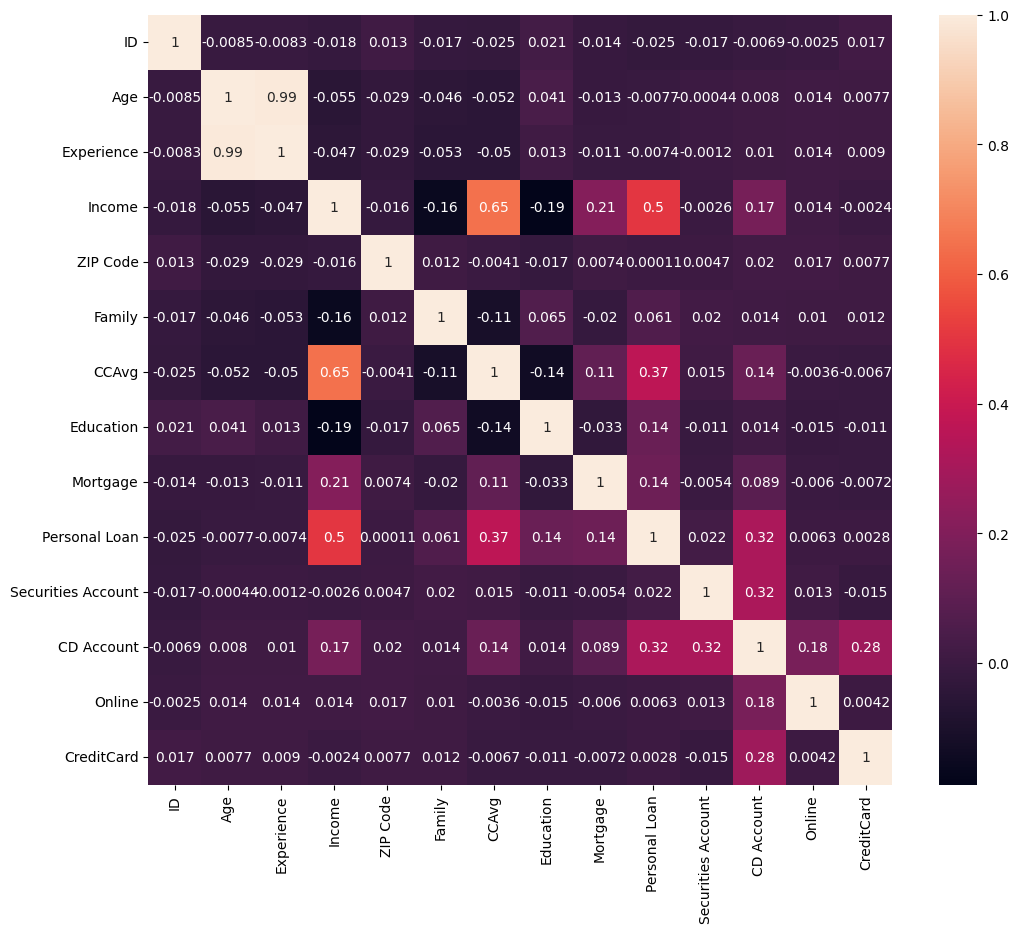

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# correlation heatmap
sb.heatmap(data.corr(), annot=True, annot_kws={"size": 10})
plt.show()

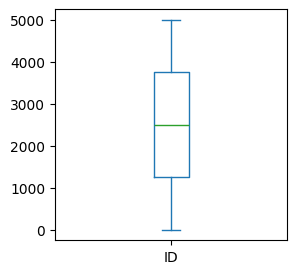

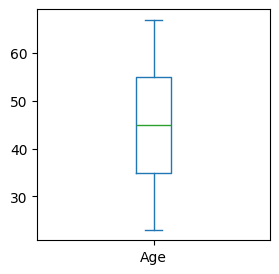

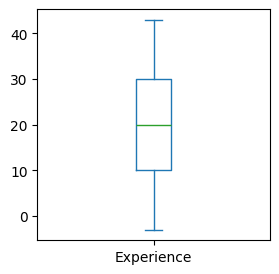

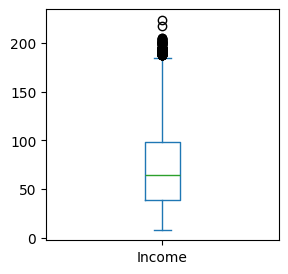

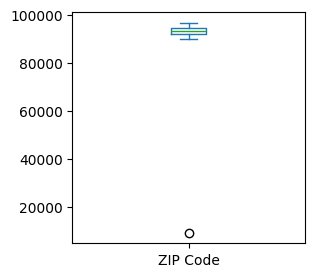

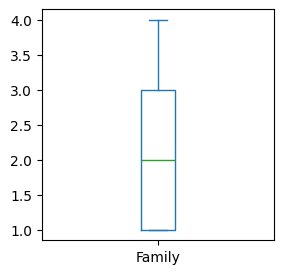

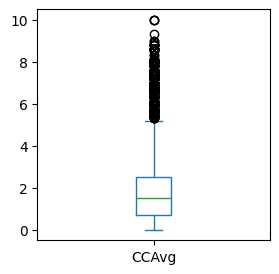

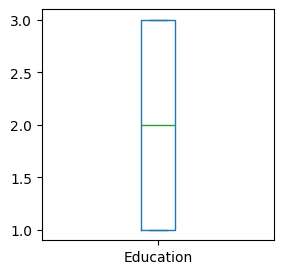

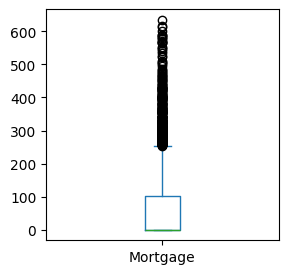

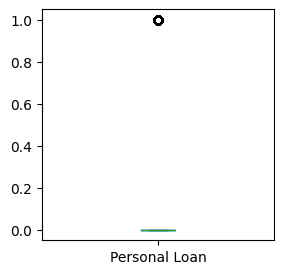

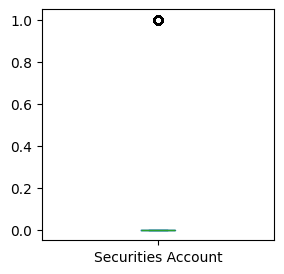

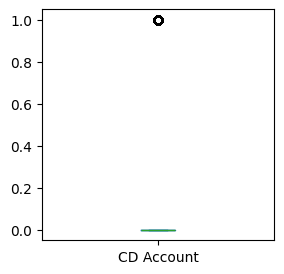

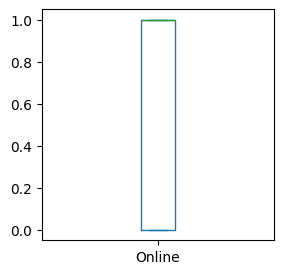

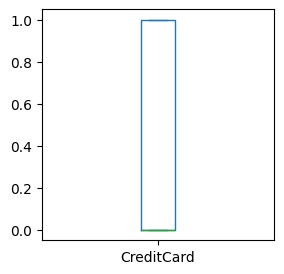

In [49]:
# box plots of all the columns in the data
for i in data.columns:
    plt.figure(figsize=(3, 3))
    data[i].plot(kind='box')
    plt.show()


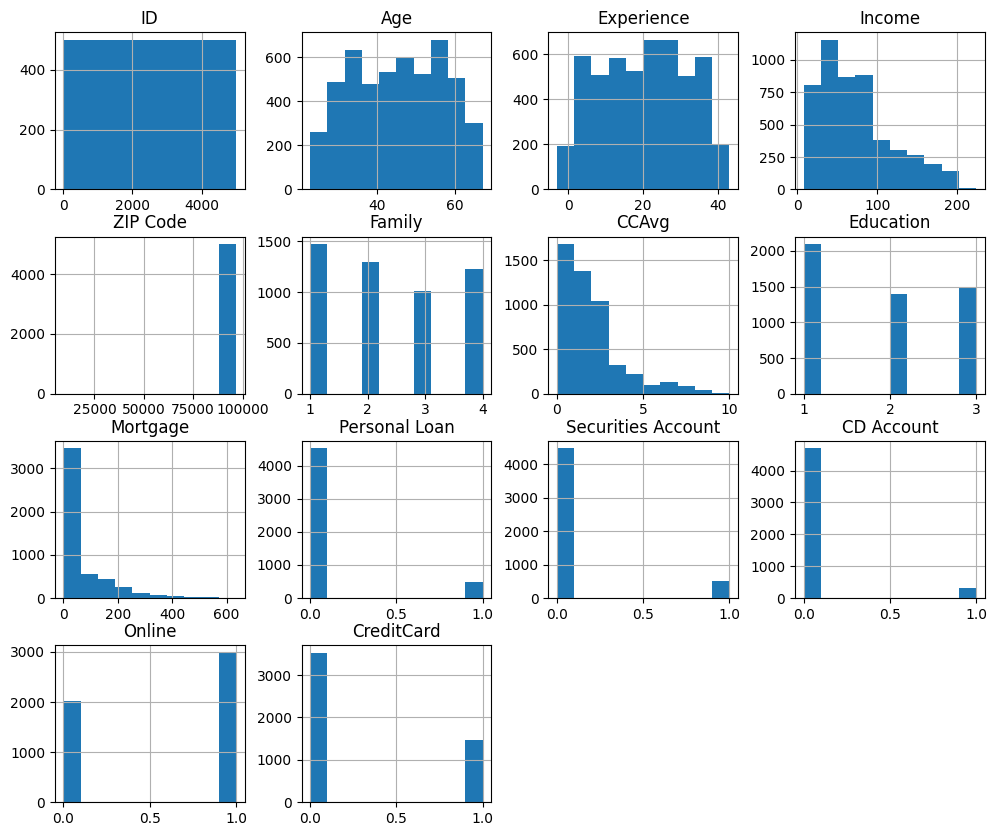

In [21]:
# histogram of the data
data.hist(figsize=(12, 10))
plt.show()

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Select my features
# features = ['CCAvg', 'Income', 'Family', 'Mortgage', 'CD Account', 'Age', 'Securities Account', 'Online', 'CreditCard']
features = ['CCAvg', 'Income', 'Education', 'Family', 'Mortgage', 'CD Account', 'Age', 'Securities Account', 'Online', 'CreditCard']
X = data[features]
y = data['Personal Loan']

# create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# scale the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.3, random_state=0)

# build and train the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# predict the test set results
y_pred = logistic_regression.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

confusion_matrix, accuracy, precision, recall, f1_score

(array([[1367,    5],
        [  26,  102]], dtype=int64),
 0.9793333333333333,
 0.9532710280373832,
 0.796875,
 0.8680851063829788)

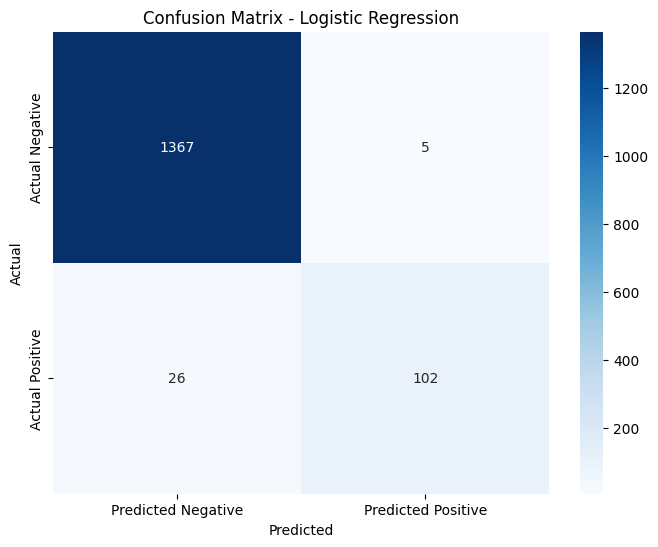

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# plot the confusion matrix for logistic regression
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [77]:
# print logistic regression performance metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1_score))


Accuracy: 0.98
Precision: 0.95
Recall: 0.80
F1 Score: 0.87


In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# build and train the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=0)
gradient_boosting.fit(X_train, y_train)

# predict the test set results
y_pred_gb = gradient_boosting.predict(X_test)

# confusion matrix and performance metrics
confusion_matrix_gb = metrics.confusion_matrix(y_test, y_pred_gb)
accuracy_gb = metrics.accuracy_score(y_test, y_pred_gb)
precision_gb = metrics.precision_score(y_test, y_pred_gb)
recall_gb = metrics.recall_score(y_test, y_pred_gb)
f1_score_gb = metrics.f1_score(y_test, y_pred_gb)

confusion_matrix_gb, accuracy_gb, precision_gb, recall_gb, f1_score_gb


(array([[1365,    7],
        [  13,  115]], dtype=int64),
 0.9866666666666667,
 0.9426229508196722,
 0.8984375,
 0.92)

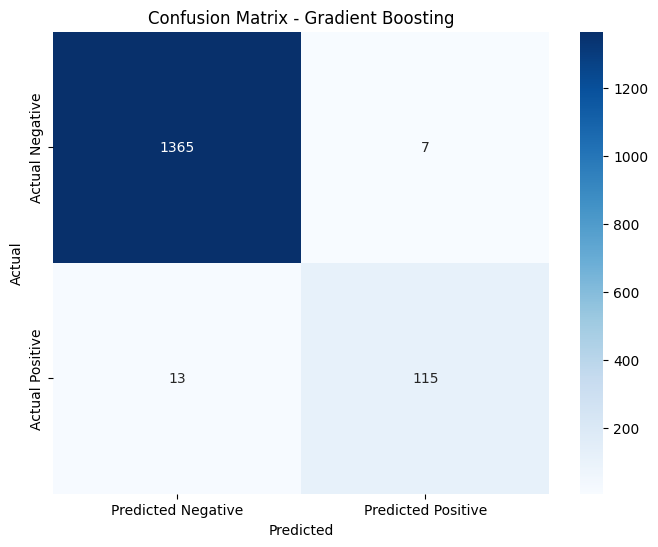

In [79]:
# plot the confusion matrix for gradient boosting
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


In [80]:
# print gradient boosting performance metrics
print('Accuracy: {:.2f}'.format(accuracy_gb))
print('Precision: {:.2f}'.format(precision_gb))
print('Recall: {:.2f}'.format(recall_gb))
print('F1 Score: {:.2f}'.format(f1_score_gb))

Accuracy: 0.99
Precision: 0.94
Recall: 0.90
F1 Score: 0.92


             Feature  Importance
21  Income Education    0.503136
22     Income Family    0.173759
20          Income^2    0.109488
1             Income    0.053437
15  CCAvg CD Account    0.033579
11      CCAvg Income    0.025010
13      CCAvg Family    0.015174
16         CCAvg Age    0.014830
12   CCAvg Education    0.011441
2          Education    0.010424


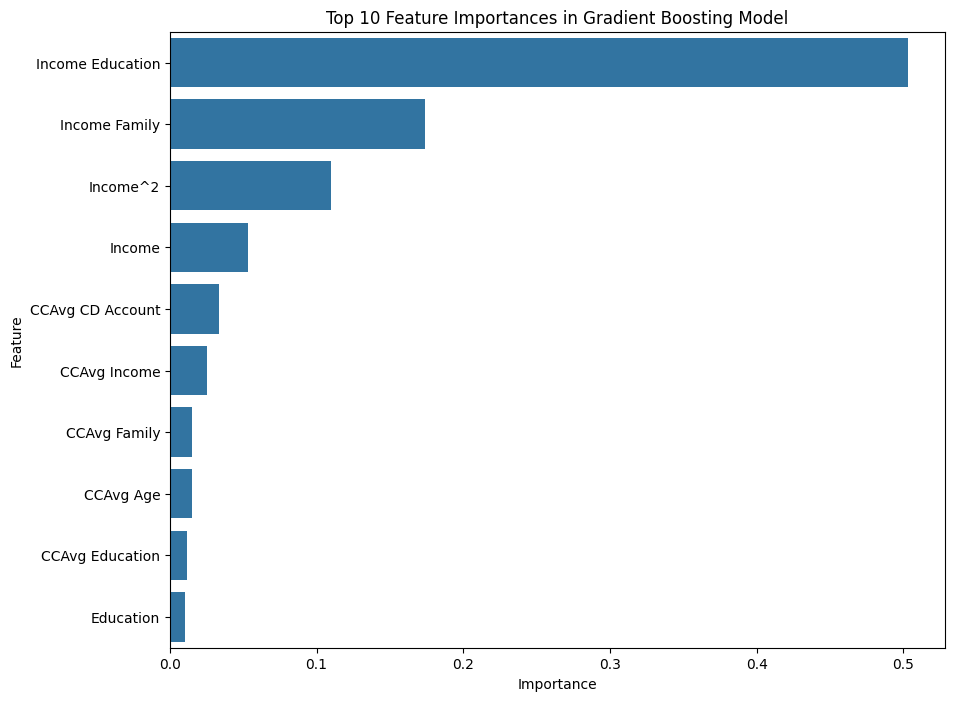

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model and polynomial features created
feature_importances = gradient_boosting.feature_importances_
feature_names = poly.get_feature_names_out(input_features=features)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame (manually instead of ace_tools)
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances in Gradient Boosting Model')
plt.show()



In [87]:
# inverse transform the polynomial features to original data
X_test_inverse_scaled = scaler.inverse_transform(X_test)

# create a DataFrame with the original values
original_feature_names = poly.get_feature_names_out(input_features=features)
X_test_original = pd.DataFrame(X_test_inverse_scaled, columns=original_feature_names)

# add the prediction probabilities to the df
X_test_original['Probability'] = y_pred_prob
X_test_original['Actual'] = y_test.values

# filter for high probability predictions
high_prob_candidates = X_test_original[X_test_original['Probability'] > 0.5]

# print the summary stats
summary_statistics = high_prob_candidates.describe()
print(summary_statistics)


            CCAvg      Income   Education      Family      Mortgage  \
count  118.000000  118.000000  118.000000  118.000000  1.180000e+02   
mean     3.999576  152.449153    2.271186    2.677966  1.144576e+02   
std      2.382463   28.929208    0.758553    1.061215  1.751991e+02   
min      0.200000   71.000000    1.000000    1.000000 -7.105427e-15   
25%      2.200000  131.250000    2.000000    2.000000 -7.105427e-15   
50%      3.900000  154.000000    2.000000    3.000000 -7.105427e-15   
75%      5.575000  179.750000    3.000000    4.000000  2.090000e+02   
max     10.000000  202.000000    3.000000    4.000000  5.900000e+02   

       CD Account         Age  Securities Account      Online  CreditCard  \
count  118.000000  118.000000          118.000000  118.000000  118.000000   
mean     0.279661   46.771186            0.084746    0.669492    0.313559   
std      0.450747   11.885789            0.279691    0.472402    0.465918   
min      0.000000   26.000000            0.000000   

In [90]:
# Filter customers based on the suggested thresholds
potential_candidates = data[
    (data['CCAvg'] > 4) 
    (data['Income'] > 152) &
    (data['Education'] > 2) &
    (data['Family'] >= 3) &
    (data['Mortgage'] > 114)
]

# Display potential candidates
print(potential_candidates)


        ID  Age  Experience  Income  ZIP Code  Family     CCAvg  Education  \
782    783   54          30     194     92056       3  6.000000          3   
1495  1496   52          28     178     92647       3  5.400000          3   
2014  2015   49          19     169     95054       3  5.666667          3   
2490  2491   52          28     168     90404       3  6.500000          3   
2593  2594   48          23     161     96003       4  7.900000          3   
2812  2813   53          28     183     96008       3  8.200000          3   
2956  2957   62          38     195     91125       4  5.200000          3   
3702  3703   50          25     160     93108       4  4.300000          3   
4008  4009   61          31     154     94555       3  7.500000          3   
4020  4021   58          32     191     93943       4  5.200000          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
782        587              1                   1           1       